In [ ]:
import pandas as pd

# Load the CSV files
file1 = "data/bitter-train.tsv"  # Replace with the path to your first CSV file
file2 = "data/Bitter.csv"        # Replace with the path to your second CSV file

# Read the CSV files into DataFrames
df1 = pd.read_csv(file1, sep='\t')  # Corrected separator for TSV
df2 = pd.read_csv(file2)
bitter_train_with_features = pd.concat(
    [
        df1.reset_index(drop=True),
        df2,
        
    ],
    axis=1
)


# Save the merged DataFrame to a new CSV file
# bitter_train_with_features.to_csv("bb.csv", index=False)

# print("Merged CSV saved as 'output/bitter-train-with-all-features.csv'")


C:\Users\singh\AppData\Local\Temp\ipykernel_10120\3639434414.py:9: DtypeWarning: Columns (1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,25

Merged CSV saved as 'output/bitter-train-with-all-features.csv'


In [2]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from boruta import BorutaPy
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
import pandas as pd
# file_path = "bb.csv"
bitter_features = bitter_train_with_features


In [3]:
non_numeric_columns = bitter_features.iloc[:, :7].columns
non_numeric_columns

Index(['Name', 'Taste', 'Reference', 'SMILES', 'Canonical SMILES', 'Bitter',
       'SMILES'],
      dtype='object')

In [4]:
numeric_columns = bitter_features.iloc[:, 7:].columns

In [5]:
len(numeric_columns)

15488

In [6]:
import pandas as pd
import numpy as np

def process_numerical_data(numerical_data, fill_method='median', remove_nan_rows=False, output_file=None):
    """
    Processes numerical data from a file and either removes rows with NaN values
    or replaces NaN values with mean/median.

    Parameters:
    - file_path (str): Path to the file containing the data.
    - fill_method (str): Method to fill NaN values ('mean' or 'median'). Ignored if remove_nan_rows is True.
    - remove_nan_rows (bool): Whether to remove rows with NaN values instead of replacing them.
    - output_file (str, optional): Path to save the processed data as a CSV file.

    Returns:
    - pd.DataFrame: Processed numerical data.
    """
    # Load data
    
    # Replace NaN with the specified method
    if fill_method not in ['mean', 'median']:
        raise ValueError("fill_method must be either 'mean' or 'median'")
    
    numerical_data = numerical_data.applymap(lambda x: pd.to_numeric(x, errors='coerce'))
    numerical_data = numerical_data.apply(lambda col: col.fillna(getattr(col, fill_method)()) if col.dtype in ['float64', 'int64'] else col)

    # Replace infinities with NaN
    numerical_data.replace([np.inf, -np.inf], np.nan, inplace=True)

    # Fill remaining NaN values with the specified method
    numerical_data = numerical_data.fillna(getattr(numerical_data, fill_method)())

    print(f"NaN values have been replaced with the column {fill_method}.")

    # Clip extreme values
    numerical_data = numerical_data.clip(lower=-1e6, upper=1e6)

    # Save the results to a CSV file if an output file path is provided
    

    return numerical_data

# Replace NaN values with the column mean
bitter_features[numeric_columns] = process_numerical_data(
    bitter_features[numeric_columns],
    fill_method="mean",
    output_file="output/mean/processed_mean_bitter_train.csv"
)

print(bitter_features)


NaN values have been replaced with the column mean.
                                              Name   Taste  \
0                                          Sucrose   Sweet   
1     Sucralose / 4,1',6'-Trichloro-galactosucrose   Sweet   
2                                          Alitame   Sweet   
3     Aspartame/Aspartyl-phenylalanine methylester   Sweet   
4                                         Tagatose   Sweet   
...                                            ...     ...   
2252                   6-Methyl-2-pyridinemethanol  Bitter   
2253                       4-hydroxybenzyl alcohol  Bitter   
2254                             4-Benzoylpyridine  Bitter   
2255               4-(5-Methyl-2-furyl)-2-butanone  Bitter   
2256                             CALCIUM HYDROXIDE  Bitter   

                             Reference  \
0                  Rojas et al. (2017)   
1                  Rojas et al. (2017)   
2                  Rojas et al. (2017)   
3                  Rojas et al. (20

In [8]:
# bitter_features.to_csv('bbb.csv',index=False)

In [18]:
# import pandas as pd
# bitter_features = pd.read_csv("output/mean/processed_mean_bitter_train.csv")

### Precprocessing

In [7]:
df_columns = bitter_features.iloc[:, 7:].columns
df = bitter_features[df_columns]

In [8]:
non_numeric_columns = bitter_features.iloc[:, :7].columns
non_numeric_data = bitter_features[non_numeric_columns]

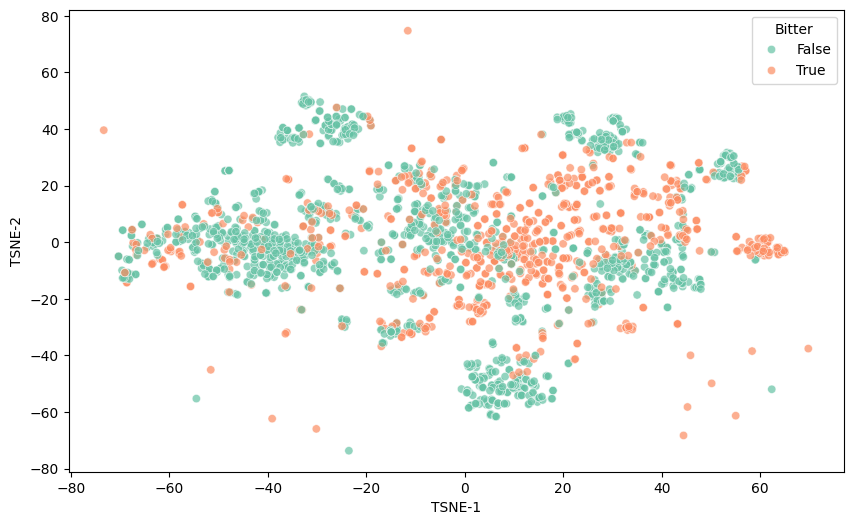

In [13]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'df' is your processed numerical data (only numeric features)
# and 'non_numeric_data' contains your labels or categorical info (e.g., 'Bitter' column)

# Standardize the data before t-SNE
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

# Apply t-SNE to reduce to 2 dimensions
tsne = TSNE(n_components=2, random_state=42, perplexity=30, n_iter=1000)
tsne_results = tsne.fit_transform(df_scaled)

# Create a new DataFrame for visualization
tsne_df = pd.DataFrame(data=tsne_results, columns=['TSNE-1', 'TSNE-2'])

# Add the 'Bitter' labels for color mapping (assuming it's in the first 7 columns, e.g., 3rd or 6th column)
if 'Bitter' in non_numeric_data.columns:
    tsne_df['Bitter'] = non_numeric_data['Bitter']
else:
    # fallback to a default label if not found
    tsne_df['Bitter'] = "Unknown"

# Plot the t-SNE results
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x='TSNE-1', y='TSNE-2',
    hue='Bitter',
    palette='Set2',
    data=tsne_df,
    legend="full",
    alpha=0.7
)
plt.title("")
plt.show()


In [9]:
# Extract new column names and count name2 occurrences
column_mapping = {}
name2_counts = {}
name2_counts['Other'] = 0
for col in df.columns:
    if ':' not in col:
        name2_counts['Other'] = name2_counts['Other']+1
        continue
    name, name2 = col.split(":")  # Split at ':'

    column_mapping[col] = name  # Map old column to new name
    
        
    # Count occurrences of each name2
    name2_counts[name2] = name2_counts.get(name2, 0) + 1

# Rename columns
df.rename(columns=column_mapping, inplace=True)

# Drop duplicate columns (keeping the first occurrence)
df = df.loc[:, ~df.columns.duplicated()]

print("Modified DataFrame:\n", df)
print("Name2 Counts:\n", name2_counts)

C:\Users\singh\AppData\Local\Temp\ipykernel_9028\1339904949.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename(columns=column_mapping, inplace=True)


Modified DataFrame:
           MW    AMW      Sv      Se      Sp      Si     Mv     Me     Mp  \
0     342.30  7.608  25.660  47.320  25.380  51.870  0.570  1.052  0.564   
1     397.70  9.468  26.000  44.310  26.580  48.070  0.619  1.055  0.633   
2     363.60  6.379  31.010  56.940  33.900  65.480  0.544  0.999  0.595   
3     294.30  7.547  23.830  39.910  24.380  44.370  0.611  1.023  0.625   
4     180.20  7.507  13.450  25.260  13.300  27.750  0.560  1.053  0.554   
...      ...    ...     ...     ...     ...     ...    ...    ...    ...   
2252  123.20  6.843  10.840  17.960  11.510  20.370  0.602  0.998  0.639   
2253  124.20  7.303  10.540  17.190  10.950  19.080  0.620  1.011  0.644   
2254  183.20  7.966  15.840  22.960  16.510  25.370  0.689  0.998  0.718   
2255  152.20  6.618  13.590  22.960  14.480  25.910  0.591  0.998  0.629   
2256   18.02  6.007   1.242   3.211   1.216   3.625  0.414  1.070  0.405   

         Mi  ...  torsions_((C,4,0),(O,2,0),(P,4,0),(F,1,0))  \
0 

In [10]:
bitter_features = pd.concat(
    [
        non_numeric_data.reset_index(drop=True),
        df,
        
    ],
    axis=1
)

In [14]:
bitter_features

,Name,Taste,Reference,SMILES,SMILES,Canonical SMILES,Bitter,SMILES,SMILES,MW,...,"torsions_((C,4,0),(O,2,0),(P,4,0),(F,1,0))","torsions_((C,4,0),(N,3,0),(C,4,0),(N,3,0))","torsions_((S,4,0),(C,3,1),(C,3,1),(Cl,1,0))","torsions_((C,3,1),(C,3,1),(O,2,0),(O,2,0))","torsions_((N,3,0),(C,4,0),(C,3,1),(O,2,1))","torsions_((C,4,0),(C,3,1),(O,2,0),(O,2,0))","torsions_((O,2,0),(O,2,0),(C,3,1),(O,1,1))","torsions_((C,3,1),(O,2,0),(O,2,0),(C,3,1))","torsions_((Cl,1,0),(C,3,1),(C,3,1),(Cl,1,0))","torsions_((O,2,0),(C,3,1),(C,3,1),(Cl,1,0))"
0,Sucrose,Sweet,Rojas et al. (2017),OCC1OC(C(C1O)O)(CO)OC1OC(CO)C(C(C1O)O)O,OCC1OC(CO)(OC2OC(CO)C(O)C(O)C2O)C(O)C1O,OCC1OC(C(C1O)O)(CO)OC1OC(CO)C(C(C1O)O)O,False,OCC1OC(C(C1O)O)(CO)OC1OC(CO)C(C(C1O)O)O,OCC1OC(CO)(OC2OC(CO)C(O)C(O)C2O)C(O)C1O,342.30,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,"Sucralose / 4,1',6'-Trichloro-galactosucrose",Sweet,Rojas et al. (2017),ClCC1OC(C(C1O)O)(CCl)OC1OC(CO)C(C(C1O)O)Cl,OCC1OC(OC2(CCl)OC(CCl)C(O)C2O)C(O)C(O)C1Cl,ClCC1OC(C(C1O)O)(CCl)OC1OC(CO)C(C(C1O)O)Cl,False,ClCC1OC(C(C1O)O)(CCl)OC1OC(CO)C(C(C1O)O)Cl,OCC1OC(OC2(CCl)OC(CCl)C(O)C2O)C(O)C(O)C1Cl,397.70,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Alitame,Sweet,Rojas et al. (2017),CC(COCNC1C(C)(C)SC1(C)C)NCOCC(CC(=O)O)N,CC(COCNC1C(C)(C)SC1(C)C)NCOCC(N)CC(O)=O,CC(COCNC1C(C)(C)SC1(C)C)NCOCC(CC(=O)O)N,False,CC(COCNC1C(C)(C)SC1(C)C)NCOCC(CC(=O)O)N,CC(COCNC1C(C)(C)SC1(C)C)NCOCC(N)CC(O)=O,363.60,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Aspartame/Aspartyl-phenylalanine methylester,Sweet,Rojas et al. (2017),COC(=O)C(NC(=O)C(CC(=O)O)N)Cc1ccccc1,COC(=O)C(CC1=CC=CC=C1)NC(=O)C(N)CC(O)=O,COC(=O)C(NC(=O)C(CC(=O)O)N)Cc1ccccc1,False,COC(=O)C(NC(=O)C(CC(=O)O)N)Cc1ccccc1,COC(=O)C(CC1=CC=CC=C1)NC(=O)C(N)CC(O)=O,294.30,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Tagatose,Sweet,Rojas et al. (2017),OCC1(O)OCC(C(C1O)O)O,OCC1(O)OCC(O)C(O)C1O,OCC1(O)OCC(C(C1O)O)O,False,OCC1(O)OCC(C(C1O)O)O,OCC1(O)OCC(O)C(O)C1O,180.20,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2252,6-Methyl-2-pyridinemethanol,Bitter,The Good Scents Company Database,CC1=NC(=CC=C1)CO,CC1=NC(CO)=CC=C1,OCc1cccc(n1)C,True,CC1=NC(=CC=C1)CO,CC1=NC(CO)=CC=C1,123.20,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2253,4-hydroxybenzyl alcohol,Bitter,The Good Scents Company Database,C1=CC(=CC=C1CO)O,OCC1=CC=C(O)C=C1,OCc1ccc(cc1)O,True,C1=CC(=CC=C1CO)O,OCC1=CC=C(O)C=C1,124.20,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2254,4-Benzoylpyridine,Bitter,The Good Scents Company Database,C1=CC=C(C=C1)C(=O)C2=CC=NC=C2,O=C(C1=CC=CC=C1)C1=CC=NC=C1,O=C(c1ccncc1)c1ccccc1,True,C1=CC=C(C=C1)C(=O)C2=CC=NC=C2,O=C(C1=CC=CC=C1)C1=CC=NC=C1,183.20,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2255,4-(5-Methyl-2-furyl)-2-butanone,Bitter,The Good Scents Company Database,CC1=CC=C(O1)CCC(=O)C,CC(=O)CCC1=CC=C(C)O1,CC(=O)CCc1ccc(o1)C,True,CC1=CC=C(O1)CCC(=O)C,CC(=O)CCC1=CC=C(C)O1,152.20,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [17]:
bitter_features.iloc[:, :9].columns

Index(['Name', 'Taste', 'Reference', 'SMILES', 'SMILES', 'Canonical SMILES',
       'Bitter', 'SMILES', 'SMILES'],
      dtype='object')

In [18]:
from sklearn.preprocessing import StandardScaler, QuantileTransformer

# Identify numeric columns (columns from index 7 onward)
numeric_columns = bitter_features.iloc[:, 9:].columns

# 1. Normalize the numeric descriptors using StandardScaler
scaler = StandardScaler()
bitter_features.loc[:, numeric_columns] = scaler.fit_transform(bitter_features.loc[:, numeric_columns])

# 2. Transform the distribution using QuantileTransformer to reduce outlier effects
# You can choose output_distribution='normal' or 'uniform' based on your needs.
qt = QuantileTransformer(output_distribution='normal', random_state=42)
bitter_features.loc[:, numeric_columns] = qt.fit_transform(bitter_features.loc[:, numeric_columns])

In [21]:
bitter_features

,Name,Taste,Reference,SMILES,SMILES,Canonical SMILES,Bitter,SMILES,SMILES,MW,...,"torsions_((C,4,0),(O,2,0),(P,4,0),(F,1,0))","torsions_((C,4,0),(N,3,0),(C,4,0),(N,3,0))","torsions_((S,4,0),(C,3,1),(C,3,1),(Cl,1,0))","torsions_((C,3,1),(C,3,1),(O,2,0),(O,2,0))","torsions_((N,3,0),(C,4,0),(C,3,1),(O,2,1))","torsions_((C,4,0),(C,3,1),(O,2,0),(O,2,0))","torsions_((O,2,0),(O,2,0),(C,3,1),(O,1,1))","torsions_((C,3,1),(O,2,0),(O,2,0),(C,3,1))","torsions_((Cl,1,0),(C,3,1),(C,3,1),(Cl,1,0))","torsions_((O,2,0),(C,3,1),(C,3,1),(Cl,1,0))"
0,Sucrose,Sweet,Rojas et al. (2017),OCC1OC(C(C1O)O)(CO)OC1OC(CO)C(C(C1O)O)O,OCC1OC(CO)(OC2OC(CO)C(O)C(O)C2O)C(O)C1O,OCC1OC(C(C1O)O)(CO)OC1OC(CO)C(C(C1O)O)O,False,OCC1OC(C(C1O)O)(CO)OC1OC(CO)C(C(C1O)O)O,OCC1OC(CO)(OC2OC(CO)C(O)C(O)C2O)C(O)C1O,0.941700,...,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338
1,"Sucralose / 4,1',6'-Trichloro-galactosucrose",Sweet,Rojas et al. (2017),ClCC1OC(C(C1O)O)(CCl)OC1OC(CO)C(C(C1O)O)Cl,OCC1OC(OC2(CCl)OC(CCl)C(O)C2O)C(O)C(O)C1Cl,ClCC1OC(C(C1O)O)(CCl)OC1OC(CO)C(C(C1O)O)Cl,False,ClCC1OC(C(C1O)O)(CCl)OC1OC(CO)C(C(C1O)O)Cl,OCC1OC(OC2(CCl)OC(CCl)C(O)C2O)C(O)C(O)C1Cl,1.301191,...,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338
2,Alitame,Sweet,Rojas et al. (2017),CC(COCNC1C(C)(C)SC1(C)C)NCOCC(CC(=O)O)N,CC(COCNC1C(C)(C)SC1(C)C)NCOCC(N)CC(O)=O,CC(COCNC1C(C)(C)SC1(C)C)NCOCC(CC(=O)O)N,False,CC(COCNC1C(C)(C)SC1(C)C)NCOCC(CC(=O)O)N,CC(COCNC1C(C)(C)SC1(C)C)NCOCC(N)CC(O)=O,1.147946,...,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338
3,Aspartame/Aspartyl-phenylalanine methylester,Sweet,Rojas et al. (2017),COC(=O)C(NC(=O)C(CC(=O)O)N)Cc1ccccc1,COC(=O)C(CC1=CC=CC=C1)NC(=O)C(N)CC(O)=O,COC(=O)C(NC(=O)C(CC(=O)O)N)Cc1ccccc1,False,COC(=O)C(NC(=O)C(CC(=O)O)N)Cc1ccccc1,COC(=O)C(CC1=CC=CC=C1)NC(=O)C(N)CC(O)=O,0.633317,...,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338
4,Tagatose,Sweet,Rojas et al. (2017),OCC1(O)OCC(C(C1O)O)O,OCC1(O)OCC(O)C(O)C1O,OCC1(O)OCC(C(C1O)O)O,False,OCC1(O)OCC(C(C1O)O)O,OCC1(O)OCC(O)C(O)C1O,-0.471004,...,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2252,6-Methyl-2-pyridinemethanol,Bitter,The Good Scents Company Database,CC1=NC(=CC=C1)CO,CC1=NC(CO)=CC=C1,OCc1cccc(n1)C,True,CC1=NC(=CC=C1)CO,CC1=NC(CO)=CC=C1,-1.364339,...,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338
2253,4-hydroxybenzyl alcohol,Bitter,The Good Scents Company Database,C1=CC(=CC=C1CO)O,OCC1=CC=C(O)C=C1,OCc1ccc(cc1)O,True,C1=CC(=CC=C1CO)O,OCC1=CC=C(O)C=C1,-1.349498,...,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338
2254,4-Benzoylpyridine,Bitter,The Good Scents Company Database,C1=CC=C(C=C1)C(=O)C2=CC=NC=C2,O=C(C1=CC=CC=C1)C1=CC=NC=C1,O=C(c1ccncc1)c1ccccc1,True,C1=CC=C(C=C1)C(=O)C2=CC=NC=C2,O=C(C1=CC=CC=C1)C1=CC=NC=C1,-0.366873,...,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338
2255,4-(5-Methyl-2-furyl)-2-butanone,Bitter,The Good Scents Company Database,CC1=CC=C(O1)CCC(=O)C,CC(=O)CCC1=CC=C(C)O1,CC(=O)CCc1ccc(o1)C,True,CC1=CC=C(O1)CCC(=O)C,CC(=O)CCC1=CC=C(C)O1,-0.907080,...,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338


In [22]:
# Set the variance threshold
variance_threshold = 0.2

# Select only numeric columns starting from the 7th column (index 6)
numeric_df = bitter_features.iloc[:, 9:]  # Start from the 7th column

# Calculate the variance for the numeric columns
variances = numeric_df.var()

# Drop numeric columns with variance below the threshold
numeric_df_filtered = numeric_df.loc[:, variances >= variance_threshold]

# Combine the non-numeric columns with the filtered numeric columns
bitter_features = pd.concat([bitter_features.iloc[:, :9], numeric_df_filtered], axis=1)

In [24]:
# Set the correlation threshold
correlation_threshold = 0.7

# Select only numeric columns starting from the 7th column (index 6)
numeric_df = bitter_features.iloc[:, 9:]

# Clean the data by converting non-numeric values to NaN
numeric_df = numeric_df.apply(pd.to_numeric, errors='coerce')

# Calculate the correlation matrix
corr_matrix = numeric_df.corr()

# Get the upper triangle of the correlation matrix
upper_triangle = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

# Identify columns to drop based on correlation threshold
columns_to_drop = []
for col in upper_triangle.columns:
    # Find pairs with correlation above the threshold
    correlated_columns = upper_triangle[col][upper_triangle[col] > correlation_threshold].index.tolist()
    for correlated_col in correlated_columns:
        if correlated_col not in columns_to_drop:
            columns_to_drop.append(correlated_col)

# Drop the identified columns from the original DataFrame
df_filtered = numeric_df.drop(columns=columns_to_drop)

# Combine the non-numeric columns with the filtered numeric columns
df_filtered_full = pd.concat([bitter_features.iloc[:, :9], df_filtered], axis=1)

In [25]:
bitter_features = df_filtered_full

In [26]:
bitter_features

,Name,Taste,Reference,SMILES,SMILES,Canonical SMILES,Bitter,SMILES,SMILES,Psi_i_1s,...,"torsions_((C,3,1),(C,3,1),(N,2,1),(C,3,1))","torsions_((C,3,1),(C,4,0),(O,2,0),(C,3,1))","torsions_((C,3,1),(C,4,0),(C,3,1),(C,3,1))","torsions_((C,3,1),(C,3,1),(N,3,1),(O,1,1))","torsions_((C,3,1),(C,3,1),(N,3,0),(C,3,1))","torsions_((C,4,0),(N,3,0),(C,3,1),(C,3,1))","torsions_((C,3,1),(C,3,1),(C,4,0),(N,3,0))","torsions_((C,3,1),(C,4,0),(C,3,1),(O,1,1))","torsions_((C,4,0),(C,3,1),(N,3,0),(C,3,1))","torsions_((O,2,0),(C,3,1),(C,3,1),(Cl,1,0))"
0,Sucrose,Sweet,Rojas et al. (2017),OCC1OC(C(C1O)O)(CO)OC1OC(CO)C(C(C1O)O)O,OCC1OC(CO)(OC2OC(CO)C(O)C(O)C2O)C(O)C1O,OCC1OC(C(C1O)O)(CO)OC1OC(CO)C(C(C1O)O)O,False,OCC1OC(C(C1O)O)(CO)OC1OC(CO)C(C(C1O)O)O,OCC1OC(CO)(OC2OC(CO)C(O)C(O)C2O)C(O)C1O,-5.199338,...,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338
1,"Sucralose / 4,1',6'-Trichloro-galactosucrose",Sweet,Rojas et al. (2017),ClCC1OC(C(C1O)O)(CCl)OC1OC(CO)C(C(C1O)O)Cl,OCC1OC(OC2(CCl)OC(CCl)C(O)C2O)C(O)C(O)C1Cl,ClCC1OC(C(C1O)O)(CCl)OC1OC(CO)C(C(C1O)O)Cl,False,ClCC1OC(C(C1O)O)(CCl)OC1OC(CO)C(C(C1O)O)Cl,OCC1OC(OC2(CCl)OC(CCl)C(O)C2O)C(O)C(O)C1Cl,-5.199338,...,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338
2,Alitame,Sweet,Rojas et al. (2017),CC(COCNC1C(C)(C)SC1(C)C)NCOCC(CC(=O)O)N,CC(COCNC1C(C)(C)SC1(C)C)NCOCC(N)CC(O)=O,CC(COCNC1C(C)(C)SC1(C)C)NCOCC(CC(=O)O)N,False,CC(COCNC1C(C)(C)SC1(C)C)NCOCC(CC(=O)O)N,CC(COCNC1C(C)(C)SC1(C)C)NCOCC(N)CC(O)=O,-5.199338,...,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338
3,Aspartame/Aspartyl-phenylalanine methylester,Sweet,Rojas et al. (2017),COC(=O)C(NC(=O)C(CC(=O)O)N)Cc1ccccc1,COC(=O)C(CC1=CC=CC=C1)NC(=O)C(N)CC(O)=O,COC(=O)C(NC(=O)C(CC(=O)O)N)Cc1ccccc1,False,COC(=O)C(NC(=O)C(CC(=O)O)N)Cc1ccccc1,COC(=O)C(CC1=CC=CC=C1)NC(=O)C(N)CC(O)=O,-5.199338,...,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338
4,Tagatose,Sweet,Rojas et al. (2017),OCC1(O)OCC(C(C1O)O)O,OCC1(O)OCC(O)C(O)C1O,OCC1(O)OCC(C(C1O)O)O,False,OCC1(O)OCC(C(C1O)O)O,OCC1(O)OCC(O)C(O)C1O,-5.199338,...,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2252,6-Methyl-2-pyridinemethanol,Bitter,The Good Scents Company Database,CC1=NC(=CC=C1)CO,CC1=NC(CO)=CC=C1,OCc1cccc(n1)C,True,CC1=NC(=CC=C1)CO,CC1=NC(CO)=CC=C1,1.090995,...,1.858747,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338
2253,4-hydroxybenzyl alcohol,Bitter,The Good Scents Company Database,C1=CC(=CC=C1CO)O,OCC1=CC=C(O)C=C1,OCc1ccc(cc1)O,True,C1=CC(=CC=C1CO)O,OCC1=CC=C(O)C=C1,0.877196,...,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338
2254,4-Benzoylpyridine,Bitter,The Good Scents Company Database,C1=CC=C(C=C1)C(=O)C2=CC=NC=C2,O=C(C1=CC=CC=C1)C1=CC=NC=C1,O=C(c1ccncc1)c1ccccc1,True,C1=CC=C(C=C1)C(=O)C2=CC=NC=C2,O=C(C1=CC=CC=C1)C1=CC=NC=C1,-5.199338,...,1.858747,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338
2255,4-(5-Methyl-2-furyl)-2-butanone,Bitter,The Good Scents Company Database,CC1=CC=C(O1)CCC(=O)C,CC(=O)CCC1=CC=C(C)O1,CC(=O)CCc1ccc(o1)C,True,CC1=CC=C(O1)CCC(=O)C,CC(=O)CCC1=CC=C(C)O1,-5.199338,...,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338


### Outlier Detection and removal

In [27]:
replaced_data_mean = bitter_features.iloc[:, 9:]

In [28]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import IsolationForest, RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from boruta import BorutaPy
# Standardize the feature data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(replaced_data_mean)

# Initialize and fit Isolation Forest
iso_forest = IsolationForest(n_estimators = 100, contamination = 0.01, max_samples ='auto')
outliers = iso_forest.fit_predict(X_scaled)

# Add the outliers to the dataframe
bitter_features['outlier'] = outliers
print(f"Number of outliers detected: {sum(bitter_features['outlier'] == -1)}")

Number of outliers detected: 0


C:\Users\singh\AppData\Local\Temp\ipykernel_9028\3079659417.py:3: UserWarning: The palette list has more values (2) than needed (1), which may not be intended.
  sns.scatterplot(x=bitter_features.index, y='Bitter', hue='outlier', data=bitter_features, palette=['blue', 'red'])


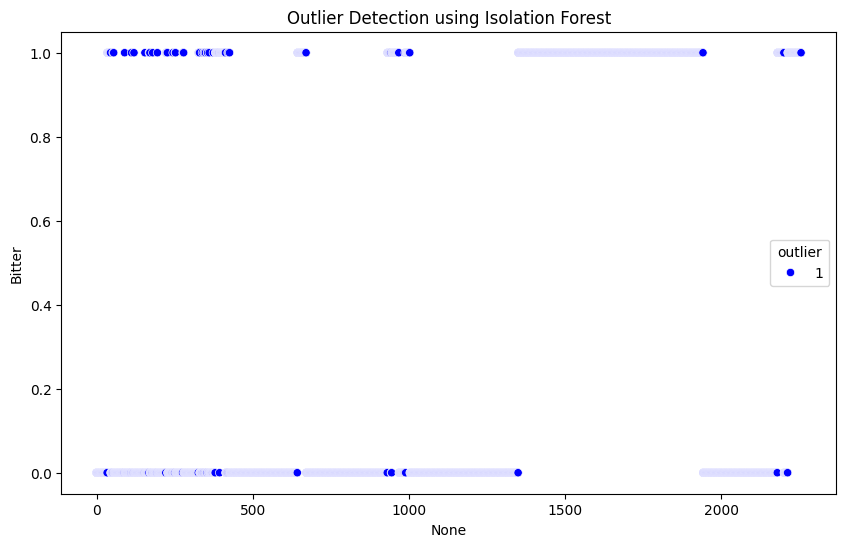

In [29]:
# Plot the outliers
plt.figure(figsize=(10, 6))
sns.scatterplot(x=bitter_features.index, y='Bitter', hue='outlier', data=bitter_features, palette=['blue', 'red'])
plt.title('Outlier Detection using Isolation Forest')
plt.show()

In [30]:
bitter_features = bitter_features[bitter_features['outlier'] == 1].drop('outlier', axis=1)

In [32]:
bitter_features.to_csv('output/mean/processed_mean_bitter_train.csv',index=False)

In [42]:
bitter_features

,Name,Taste,Reference,SMILES,SMILES.1,Canonical SMILES,Bitter,SMILES.2,SMILES.3,Psi_i_1s,...,"torsions_((C,3,1),(C,3,1),(N,2,1),(C,3,1))","torsions_((C,3,1),(C,4,0),(O,2,0),(C,3,1))","torsions_((C,3,1),(C,4,0),(C,3,1),(C,3,1))","torsions_((C,3,1),(C,3,1),(N,3,1),(O,1,1))","torsions_((C,3,1),(C,3,1),(N,3,0),(C,3,1))","torsions_((C,4,0),(N,3,0),(C,3,1),(C,3,1))","torsions_((C,3,1),(C,3,1),(C,4,0),(N,3,0))","torsions_((C,3,1),(C,4,0),(C,3,1),(O,1,1))","torsions_((C,4,0),(C,3,1),(N,3,0),(C,3,1))","torsions_((O,2,0),(C,3,1),(C,3,1),(Cl,1,0))"
0,Sucrose,Sweet,Rojas et al. (2017),OCC1OC(C(C1O)O)(CO)OC1OC(CO)C(C(C1O)O)O,OCC1OC(CO)(OC2OC(CO)C(O)C(O)C2O)C(O)C1O,OCC1OC(C(C1O)O)(CO)OC1OC(CO)C(C(C1O)O)O,False,OCC1OC(C(C1O)O)(CO)OC1OC(CO)C(C(C1O)O)O,OCC1OC(CO)(OC2OC(CO)C(O)C(O)C2O)C(O)C1O,-5.199338,...,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338
1,"Sucralose / 4,1',6'-Trichloro-galactosucrose",Sweet,Rojas et al. (2017),ClCC1OC(C(C1O)O)(CCl)OC1OC(CO)C(C(C1O)O)Cl,OCC1OC(OC2(CCl)OC(CCl)C(O)C2O)C(O)C(O)C1Cl,ClCC1OC(C(C1O)O)(CCl)OC1OC(CO)C(C(C1O)O)Cl,False,ClCC1OC(C(C1O)O)(CCl)OC1OC(CO)C(C(C1O)O)Cl,OCC1OC(OC2(CCl)OC(CCl)C(O)C2O)C(O)C(O)C1Cl,-5.199338,...,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338
2,Alitame,Sweet,Rojas et al. (2017),CC(COCNC1C(C)(C)SC1(C)C)NCOCC(CC(=O)O)N,CC(COCNC1C(C)(C)SC1(C)C)NCOCC(N)CC(O)=O,CC(COCNC1C(C)(C)SC1(C)C)NCOCC(CC(=O)O)N,False,CC(COCNC1C(C)(C)SC1(C)C)NCOCC(CC(=O)O)N,CC(COCNC1C(C)(C)SC1(C)C)NCOCC(N)CC(O)=O,-5.199338,...,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338
3,Aspartame/Aspartyl-phenylalanine methylester,Sweet,Rojas et al. (2017),COC(=O)C(NC(=O)C(CC(=O)O)N)Cc1ccccc1,COC(=O)C(CC1=CC=CC=C1)NC(=O)C(N)CC(O)=O,COC(=O)C(NC(=O)C(CC(=O)O)N)Cc1ccccc1,False,COC(=O)C(NC(=O)C(CC(=O)O)N)Cc1ccccc1,COC(=O)C(CC1=CC=CC=C1)NC(=O)C(N)CC(O)=O,-5.199338,...,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338
4,Tagatose,Sweet,Rojas et al. (2017),OCC1(O)OCC(C(C1O)O)O,OCC1(O)OCC(O)C(O)C1O,OCC1(O)OCC(C(C1O)O)O,False,OCC1(O)OCC(C(C1O)O)O,OCC1(O)OCC(O)C(O)C1O,-5.199338,...,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2252,6-Methyl-2-pyridinemethanol,Bitter,The Good Scents Company Database,CC1=NC(=CC=C1)CO,CC1=NC(CO)=CC=C1,OCc1cccc(n1)C,True,CC1=NC(=CC=C1)CO,CC1=NC(CO)=CC=C1,1.090995,...,1.858747,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338
2253,4-hydroxybenzyl alcohol,Bitter,The Good Scents Company Database,C1=CC(=CC=C1CO)O,OCC1=CC=C(O)C=C1,OCc1ccc(cc1)O,True,C1=CC(=CC=C1CO)O,OCC1=CC=C(O)C=C1,0.877196,...,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338
2254,4-Benzoylpyridine,Bitter,The Good Scents Company Database,C1=CC=C(C=C1)C(=O)C2=CC=NC=C2,O=C(C1=CC=CC=C1)C1=CC=NC=C1,O=C(c1ccncc1)c1ccccc1,True,C1=CC=C(C=C1)C(=O)C2=CC=NC=C2,O=C(C1=CC=CC=C1)C1=CC=NC=C1,-5.199338,...,1.858747,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338
2255,4-(5-Methyl-2-furyl)-2-butanone,Bitter,The Good Scents Company Database,CC1=CC=C(O1)CCC(=O)C,CC(=O)CCC1=CC=C(C)O1,CC(=O)CCc1ccc(o1)C,True,CC1=CC=C(O1)CCC(=O)C,CC(=O)CCC1=CC=C(C)O1,-5.199338,...,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338


In [33]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import IsolationForest, RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from boruta import BorutaPy
bitter_features = pd.read_csv('output/mean/processed_mean_bitter_train.csv')

In [34]:
replaced_data_mean = bitter_features.iloc[:, 9:]

In [37]:
y = bitter_features['Bitter']

# Features
X = replaced_data_mean

# Initialize and fit Boruta for feature selection
rf = RandomForestClassifier(n_estimators=200, n_jobs=-1, max_depth=5)
boruta = BorutaPy(estimator=rf, random_state=42, verbose=2,max_iter=20)
bt = boruta.fit_transform(X.values, y.values)

# # Select important features
# significant_feature_names = X.columns[boruta.support_].tolist()
# print("Most Important Features:", significant_feature_names)

Iteration: 	1 / 20
Confirmed: 	0
Tentative: 	1903
Rejected: 	0
Iteration: 	2 / 20
Confirmed: 	0
Tentative: 	1903
Rejected: 	0
Iteration: 	3 / 20
Confirmed: 	0
Tentative: 	1903
Rejected: 	0
Iteration: 	4 / 20
Confirmed: 	0
Tentative: 	1903
Rejected: 	0
Iteration: 	5 / 20
Confirmed: 	0
Tentative: 	1903
Rejected: 	0
Iteration: 	6 / 20
Confirmed: 	0
Tentative: 	1903
Rejected: 	0
Iteration: 	7 / 20
Confirmed: 	0
Tentative: 	1903
Rejected: 	0
Iteration: 	8 / 20
Confirmed: 	408
Tentative: 	378
Rejected: 	1117
Iteration: 	9 / 20
Confirmed: 	408
Tentative: 	378
Rejected: 	1117
Iteration: 	10 / 20
Confirmed: 	408
Tentative: 	378
Rejected: 	1117
Iteration: 	11 / 20
Confirmed: 	408
Tentative: 	378
Rejected: 	1117
Iteration: 	12 / 20
Confirmed: 	429
Tentative: 	270
Rejected: 	1204
Iteration: 	13 / 20
Confirmed: 	429
Tentative: 	270
Rejected: 	1204
Iteration: 	14 / 20
Confirmed: 	429
Tentative: 	270
Rejected: 	1204
Iteration: 	15 / 20
Confirmed: 	429
Tentative: 	270
Rejected: 	1204
Iteration: 	16 / 

In [38]:
boruta.ranking_

array([ 913,  331,  572, ...,  394,    2, 1379])

SAving boruta_mean

In [39]:
from joblib import dump, load
# Save the fitted Boruta model
dump(boruta, 'model/boruta/boruta_mean_model.joblib')

['model/boruta/boruta_mean_model.joblib']

### Models

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import IsolationForest, RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from boruta import BorutaPy
from joblib import dump, load
bitter_features = pd.read_csv('output/mean/processed_mean_bitter_train.csv')

replaced_data_mean = bitter_features.iloc[:, 9:]

y = bitter_features['Bitter']

# Features
X = replaced_data_mean

In [3]:
# for i in range(2234):
#     print(y[i])

False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
True
True
True
True
True
True
True
True
True
True
True
False
False
False
False
False
False
False
True
False
True
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
True
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
True
False
False
False
False
False
False
False
True
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
True
False
False
False
False
False
False
False
False
False
False
False
False
False
True
True
True
False
False


In [2]:
# Load the saved Boruta model
boruta = load('model/boruta/boruta_mean_model.joblib')

# Transform the dataset using the loaded model
X_transformed = boruta.transform(X.values)

In [3]:
significant_feature_names = X.columns[boruta.support_].tolist()

In [46]:
import pickle

file = open('features/bitter/bitter_boruta.p','wb')
pickle.dump(significant_feature_names,file)
file.close()

In [4]:
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    accuracy_score, classification_report, roc_auc_score,
    precision_score, recall_score, f1_score, average_precision_score
)
import numpy as np

# Split data
X_train, X_test, y_train, y_test = train_test_split(X_transformed, y, test_size=0.2, random_state=42, stratify=y)

In [48]:


# Define parameter grid for RandomizedSearchCV
param_grid = {
    "n_estimators": [1500, 2000, 2500],
    "max_depth": [5, 7, 10, 15, None],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4],
    "bootstrap": [True, False]
}

# Initialize Random Forest
rf = RandomForestClassifier(random_state=42)

# Perform Randomized Search with Cross-Validation
rf_random = RandomizedSearchCV(
    estimator=rf, param_distributions=param_grid,
    n_iter=20, cv=5, verbose=2, n_jobs=-1, random_state=42, scoring='roc_auc'
)

rf_random.fit(X_train, y_train)

# Best hyperparameters
print("Best Hyperparameters:", rf_random.best_params_)

# Train the best model
best_model = rf_random.best_estimator_
y_pred = best_model.predict(X_test)
y_pred_proba = best_model.predict_proba(X_test)[:, 1]

from sklearn.metrics import confusion_matrix

# Model evaluation
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)
aupr = average_precision_score(y_test, y_pred_proba)  # AUPR
sensitivity = recall  # Sensitivity (Sn) is the same as recall

# Confusion Matrix
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()

# Calculate NER and Specificity
ner = fp / (tn + fp) if (tn + fp) > 0 else 0  # Avoid division by zero
specificity = tn / (tn + fp) if (tn + fp) > 0 else 0  # Avoid division by zero

# Print results
print("Accuracy:", accuracy)
print("Precision (P):", precision)
print("Recall (R):", recall)
print("Sensitivity (Sn):", sensitivity)
print("F1-score (F1):", f1)
print("ROC-AUC Score (AuROC):", roc_auc)
print("AUPR Score (AuPR):", aupr)
print("Non Error Rate (NER):", 1-ner)
print("Specificity (SP):", specificity)
print("Classification Report:\n", classification_report(y_test, y_pred))



Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best Hyperparameters: {'n_estimators': 2500, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_depth': 15, 'bootstrap': False}
Accuracy: 0.8915929203539823
Precision (P): 0.8851351351351351
Recall (R): 0.803680981595092
Sensitivity (Sn): 0.803680981595092
F1-score (F1): 0.8424437299035369
ROC-AUC Score (AuROC): 0.9480013586091239
AUPR Score (AuPR): 0.9123664058886699
Non Error Rate (NER): 0.9411764705882353
Specificity (SP): 0.9411764705882353
Classification Report:
               precision    recall  f1-score   support

       False       0.89      0.94      0.92       289
        True       0.89      0.80      0.84       163

    accuracy                           0.89       452
   macro avg       0.89      0.87      0.88       452
weighted avg       0.89      0.89      0.89       452



In [10]:


# # Define parameter grid for RandomizedSearchCV
# param_grid = {
#     "n_estimators": [3000],
#     "max_depth": [25],
#     "min_samples_split": [2],
#     "min_samples_leaf": [2],
#     "bootstrap": [False]
# }

# # Initialize Random Forest
# rf = RandomForestClassifier(random_state=42)

# # Perform Randomized Search with Cross-Validation
# rf_random = RandomizedSearchCV(
#     estimator=rf, param_distributions=param_grid,
#     n_iter=1000, cv=5, verbose=2, n_jobs=-1, random_state=42, scoring='roc_auc'
# )

# rf_random.fit(X_train, y_train)

# # Best hyperparameters
# print("Best Hyperparameters:", rf_random.best_params_)

# # Train the best model
# best_model = rf_random.best_estimator_
# y_pred = best_model.predict(X_test)
# y_pred_proba = best_model.predict_proba(X_test)[:, 1]

# from sklearn.metrics import confusion_matrix

# # Model evaluation
# accuracy = accuracy_score(y_test, y_pred)
# precision = precision_score(y_test, y_pred)
# recall = recall_score(y_test, y_pred)
# f1 = f1_score(y_test, y_pred)
# roc_auc = roc_auc_score(y_test, y_pred_proba)
# aupr = average_precision_score(y_test, y_pred_proba)  # AUPR
# sensitivity = recall  # Sensitivity (Sn) is the same as recall

# # Confusion Matrix
# tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()

# # Calculate NER and Specificity
# ner = fp / (tn + fp) if (tn + fp) > 0 else 0  # Avoid division by zero
# specificity = tn / (tn + fp) if (tn + fp) > 0 else 0  # Avoid division by zero

# # Print results
# print("Accuracy:", accuracy)
# print("Precision (P):", precision)
# print("Recall (R):", recall)
# print("Sensitivity (Sn):", sensitivity)
# print("F1-score (F1):", f1)
# print("ROC-AUC Score (AuROC):", roc_auc)
# print("AUPR Score (AuPR):", aupr)
# print("Non Error Rate (NER):", 1-ner)
# print("Specificity (SP):", specificity)
# print("Classification Report:\n", classification_report(y_test, y_pred))



c:\Program Files\Python38\lib\site-packages\sklearn\model_selection\_search.py:307: UserWarning: The total space of parameters 1 is smaller than n_iter=1000. Running 1 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Fitting 5 folds for each of 1 candidates, totalling 5 fits
Best Hyperparameters: {'n_estimators': 3000, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_depth': 20, 'bootstrap': False}
Accuracy: 0.8970917225950783
Precision (P): 0.8859060402684564
Recall (R): 0.8198757763975155
Sensitivity (Sn): 0.8198757763975155
F1-score (F1): 0.8516129032258064
ROC-AUC Score (AuROC): 0.930982061416844
AUPR Score (AuPR): 0.8918080758824412
Non Error Rate (NER): 0.9405594405594405
Specificity (SP): 0.9405594405594405
Classification Report:
               precision    recall  f1-score   support

       False       0.90      0.94      0.92       286
        True       0.89      0.82      0.85       161

    accuracy                           0.90       447
   macro avg       0.89      0.88      0.89       447
weighted avg       0.90      0.90      0.90       447



In [49]:
import pickle

file = open('final_model/mean2.p','wb')
pickle.dump(best_model,file)
file.close()

In [5]:
import pickle
file = open('final_model/mean2.p','rb')

best_model =pickle.load(file)

y_pred = best_model.predict(X_test)
y_pred_proba = best_model.predict_proba(X_test)[:, 1]

from sklearn.metrics import confusion_matrix

# Model evaluation
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)
aupr = average_precision_score(y_test, y_pred_proba)  # AUPR
sensitivity = recall  # Sensitivity (Sn) is the same as recall

# Confusion Matrix
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()

# Calculate NER and Specificity
ner = fp / (tn + fp) if (tn + fp) > 0 else 0  # Avoid division by zero
specificity = tn / (tn + fp) if (tn + fp) > 0 else 0  # Avoid division by zero

# Print results
print("Accuracy:", accuracy)
print("Precision (P):", precision)
print("Recall (R):", recall)
print("Sensitivity (Sn):", sensitivity)
print("F1-score (F1):", f1)
print("ROC-AUC Score (AuROC):", roc_auc)
print("AUPR Score (AuPR):", aupr)
print("Non Error Rate (NER):", 1-ner)
print("Specificity (SP):", specificity)
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.8915929203539823
Precision (P): 0.8851351351351351
Recall (R): 0.803680981595092
Sensitivity (Sn): 0.803680981595092
F1-score (F1): 0.8424437299035369
ROC-AUC Score (AuROC): 0.9480013586091239
AUPR Score (AuPR): 0.9123664058886699
Non Error Rate (NER): 0.9411764705882353
Specificity (SP): 0.9411764705882353
Classification Report:
               precision    recall  f1-score   support

       False       0.89      0.94      0.92       289
        True       0.89      0.80      0.84       163

    accuracy                           0.89       452
   macro avg       0.89      0.87      0.88       452
weighted avg       0.89      0.89      0.89       452



IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html


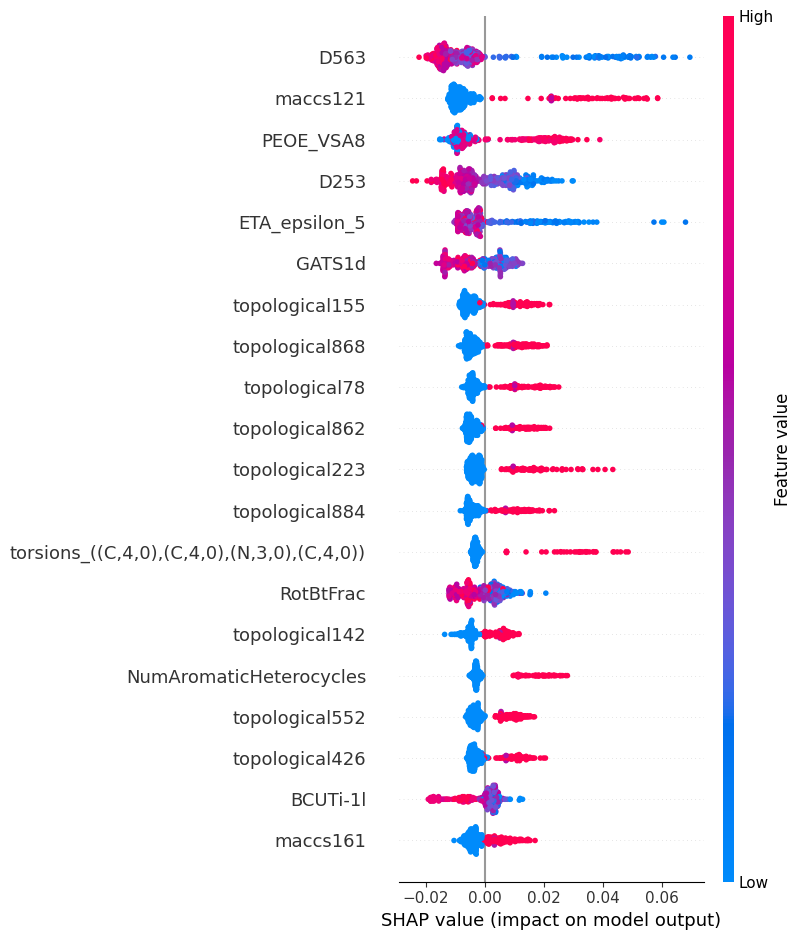

In [6]:
import shap

# Initialize the TreeExplainer for the best_model
explainer = shap.TreeExplainer(best_model)

# Compute SHAP values for the test data
# For binary classifiers, shap_values is a list with two arrays: one for each class.
shap_values = explainer.shap_values(X_test)

# Plot SHAP summary for the positive class (index 1)
# Use the significant feature names for proper labeling in the plot.
shap.summary_plot(shap_values[1], X_test, feature_names=significant_feature_names)


In [7]:
# This plots the explanation for the first test instance
shap.initjs()
shap.force_plot(explainer.expected_value[1], shap_values[1][0,:], X_test[0,:], feature_names=significant_feature_names)


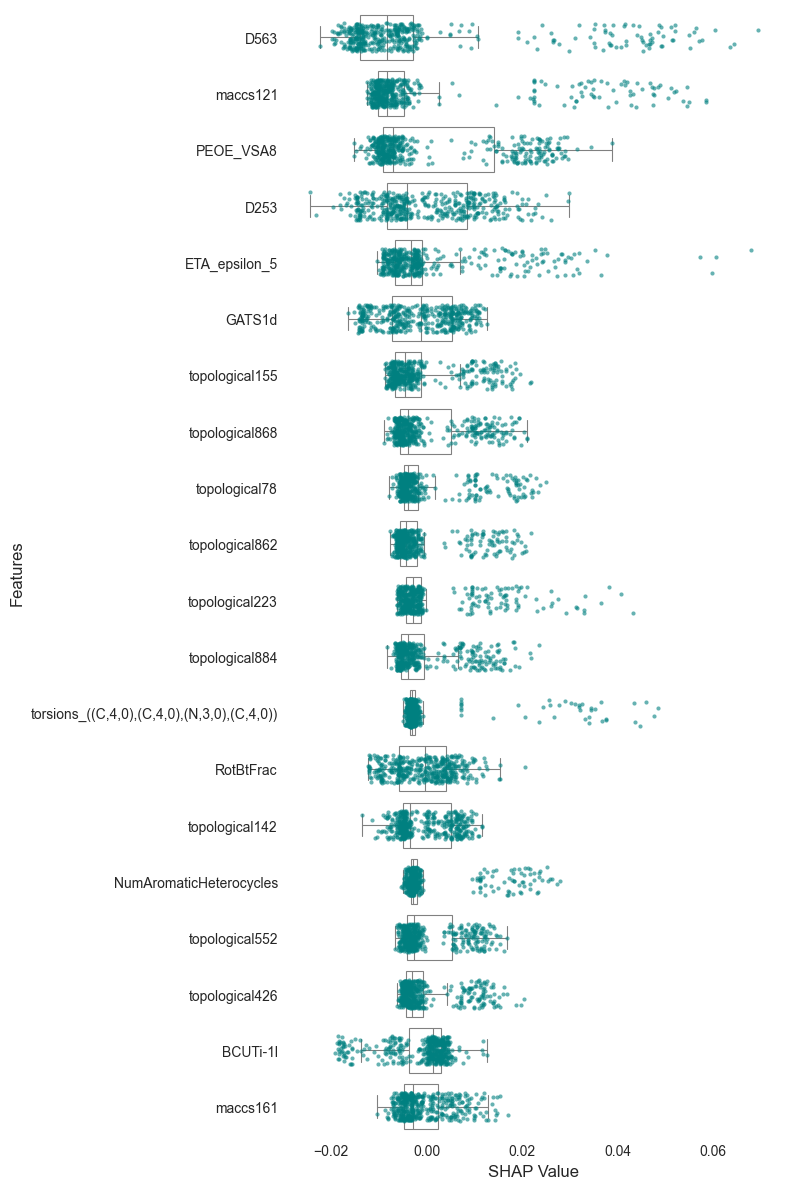

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import shap

# If shap_values is a list (common for classifiers), take the positive class
if isinstance(shap_values, list) and len(shap_values) == 2:
    shap_array = shap_values[1]
else:
    shap_array = shap_values

# Convert to DataFrame
shap_df = pd.DataFrame(shap_array, columns=significant_feature_names)

# Compute mean absolute SHAP values (importance)
feature_importance = shap_df.abs().mean().sort_values(ascending=False)
# Make sure 'shap_df_topN' and 'top_N_features' are defined
N = 20  # You can adjust this to show fewer/more features
top_N_features = feature_importance.index[:N]
shap_df_topN = shap_df[top_N_features]

# Resize figure to prevent congestion
plt.figure(figsize=(8, 0.5 * N + 2))  # Dynamic height based on N

sns.set_style("whitegrid")

# Draw boxplot
sns.boxplot(
    data=shap_df_topN,
    orient='h',
    color='white',
    showfliers=False,
    linewidth=0.8,
    boxprops=dict(edgecolor='gray'),
    whiskerprops=dict(color='gray'),
    capprops=dict(color='gray'),
    medianprops=dict(color='gray')
)

# Draw stripplot
sns.stripplot(
    data=shap_df_topN,
    orient='h',
    color='teal',
    alpha=0.6,
    jitter=0.25,
    size=3
)

# Format
plt.xlabel("SHAP Value", fontsize=12)
# plt.xlabel("SHAP Value (Median Importance)", fontsize=12)
plt.ylabel("Features", fontsize=12)
plt.yticks(fontsize=10)
plt.xticks(fontsize=10)
# plt.title(f"Top {N} Important Features (SHAP Analysis)", fontsize=14, weight='bold')
plt.grid(False)
sns.despine(left=True, bottom=True)
plt.tight_layout()
plt.show()


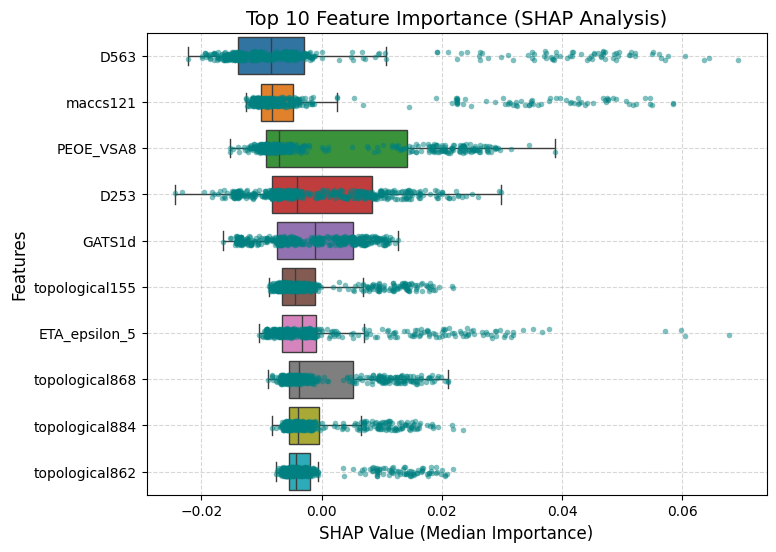

In [21]:
import shap
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assume `shap_values` is the matrix of SHAP values (num_samples x num_features)
# Assume `feature_names` is the list of feature names
if isinstance(shap_values, list) and len(shap_values) == 2:
    shap_array = shap_values[1]  # Taking SHAP values for the positive class
else:
    shap_array = shap_values  # Use directly if already in the correct shape
# Convert SHAP values to DataFrame
shap_df = pd.DataFrame(shap_array, columns=significant_feature_names)

# Compute median absolute SHAP value for each feature
median_importance = shap_df.abs().median().sort_values(ascending=False)

# Select the top 10 features
top_10_features = median_importance.head(10).index

# Extract SHAP values for top 10 features
top_10_shap_values = shap_df[top_10_features]

# Create the plot
plt.figure(figsize=(8, 6))
sns.boxplot(data=top_10_shap_values, orient='h', showfliers=False)  # Boxplot without outliers
sns.stripplot(data=top_10_shap_values, orient='h', color='teal', alpha=0.5, size=4)  # Scatter points

# Labels and title
plt.xlabel("SHAP Value (Median Importance)", fontsize=12)
plt.ylabel("Features", fontsize=12)
plt.title("Top 10 Feature Importance (SHAP Analysis)", fontsize=14)
plt.grid(True, linestyle="--", alpha=0.5)
plt.show()


In [5]:
import sys
import os

print("Python version:", sys.version)
print("Executable path:", sys.executable)

# Try installing SHAP in this exact environment
!"{sys.executable}" -m pip install shap

# Check again
try:
    import shap
    print("✅ SHAP is successfully installed and imported!")
except ImportError as e:
    print("❌ SHAP still not importing:", e)


Python version: 3.8.0 (tags/v3.8.0:fa919fd, Oct 14 2019, 19:37:50) [MSC v.1916 64 bit (AMD64)]
Executable path: c:\Program Files\Python38\python.exe
  Using cached cloudpickle-3.1.1-py3-none-any.whl.metadata (7.1 kB)
Using cached cloudpickle-3.1.1-py3-none-any.whl (20 kB)



[notice] A new release of pip is available: 25.0 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip
IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html


✅ SHAP is successfully installed and imported!
